In [1]:
import pandas as pd
from glob import glob

In [2]:
generators = ['cg', 'ctgan', 'gc', 'tvaes']
list_df = []

for i in generators:
    files = glob(f'../results/{i}/predictors*.xlsx')
    df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
    df['generator'] = i
    df['type'] = df['model'].apply(lambda x: x.split('_')[0])
    list_df.append(df)

In [19]:
metrics = ['type', 'generator', 'roc_auc', 'precision', 'accuracy', 'f1', 'recall']
sort_metrics = metrics[2:]

Obtener los mejores 10 algoritmos

In [20]:
list_best = []
for df in list_df:
    best_types = df[df['roc_auc'].notnull()].sort_values(['roc_auc', 'accuracy'], ascending=False).groupby('type').head(1).head(5)['type'].tolist()
    best_models = (
        df[df["type"].isin(best_types)]
        .dropna(subset=["roc_auc"])  # Eliminar valores nulos en roc_auc
        .sort_values(["roc_auc", "accuracy"], ascending=False)
        .groupby("type")
        .head(10)
    )
    list_best.append(best_models)

In [21]:
result_df = pd.concat(list_best, ignore_index=True)

In [22]:
result_df.sort_values(sort_metrics, ascending=False)[metrics]

,type,generator,roc_auc,precision,accuracy,f1,recall
150,NeuralNetTorch,tvaes,1.000000,0.833333,0.950,0.909091,1.0
151,NeuralNetTorch,tvaes,0.993333,0.500000,0.750,0.666667,1.0
152,NeuralNetTorch,tvaes,0.993333,0.818182,0.925,0.857143,0.9
153,NeuralNetFastAI,tvaes,0.993333,0.818182,0.925,0.857143,0.9
154,NeuralNetFastAI,tvaes,0.993333,0.769231,0.925,0.869565,1.0
...,...,...,...,...,...,...,...
95,WeightedEnsemble,ctgan,0.846667,0.450000,0.700,0.600000,0.9
96,WeightedEnsemble,ctgan,0.843333,0.421053,0.675,0.551724,0.8
97,WeightedEnsemble,ctgan,0.836667,0.380952,0.625,0.516129,0.8
98,WeightedEnsemble,ctgan,0.816667,0.461538,0.725,0.521739,0.6


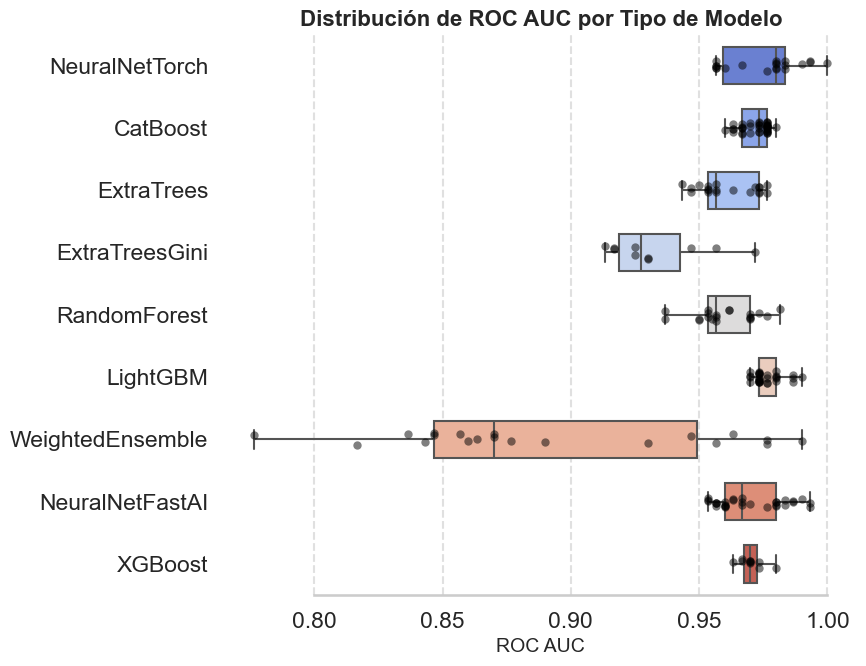

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=result_df, x="roc_auc", y="type", hue="type",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=result_df, x="roc_auc", y="type", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


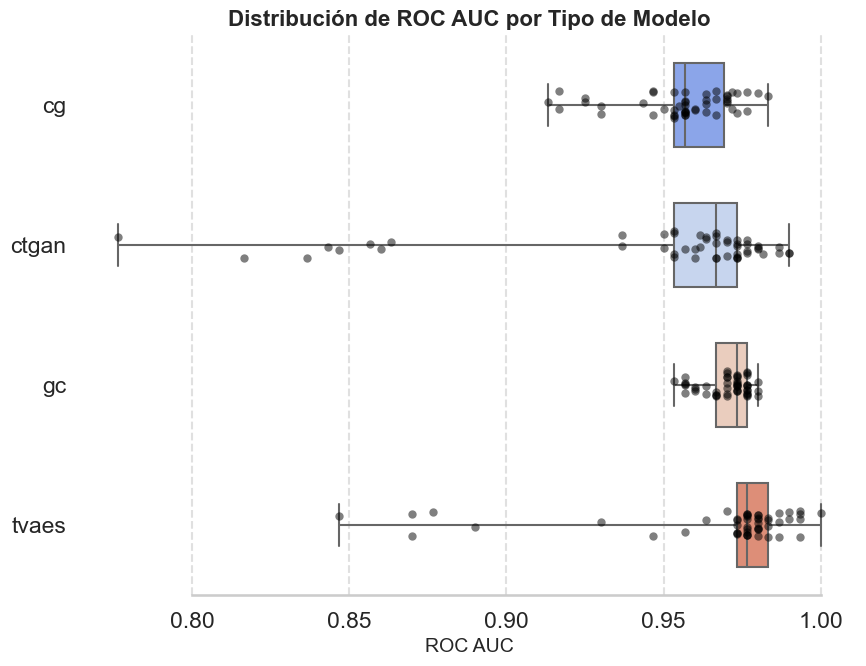

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=result_df, x="roc_auc", y="generator", hue="generator",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=result_df, x="roc_auc", y="generator", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


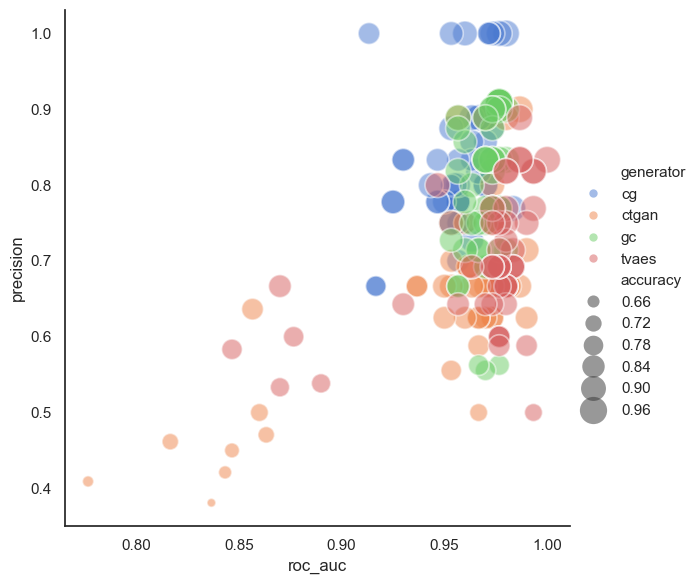

In [36]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="roc_auc", y="precision", hue="generator", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=result_df)

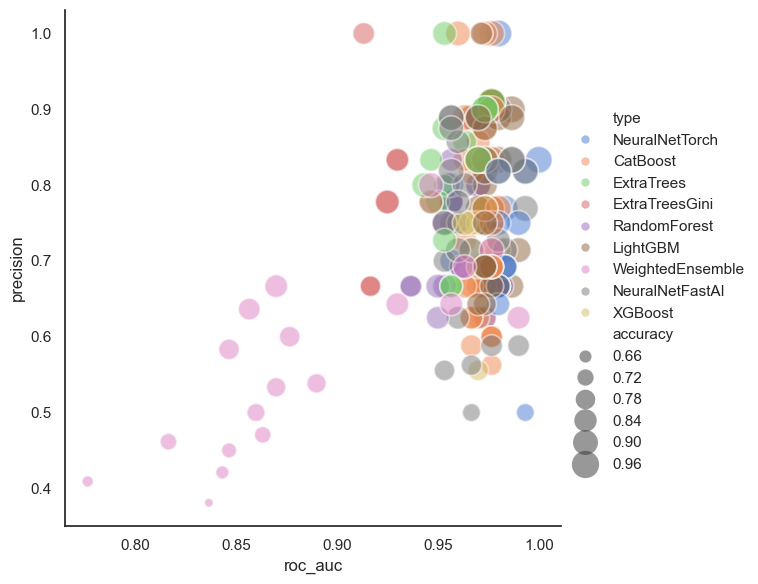

In [37]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="roc_auc", y="precision", hue="type", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=result_df)

In [48]:
result_df.melt(id_vars="generator", value_vars=sort_metrics)


,generator,variable,value
0,cg,roc_auc,0.983333
1,cg,roc_auc,0.980000
2,cg,roc_auc,0.976667
3,cg,roc_auc,0.976667
4,cg,roc_auc,0.973333
...,...,...,...
995,tvaes,recall,0.700000
996,tvaes,recall,0.600000
997,tvaes,recall,0.800000
998,tvaes,recall,0.800000


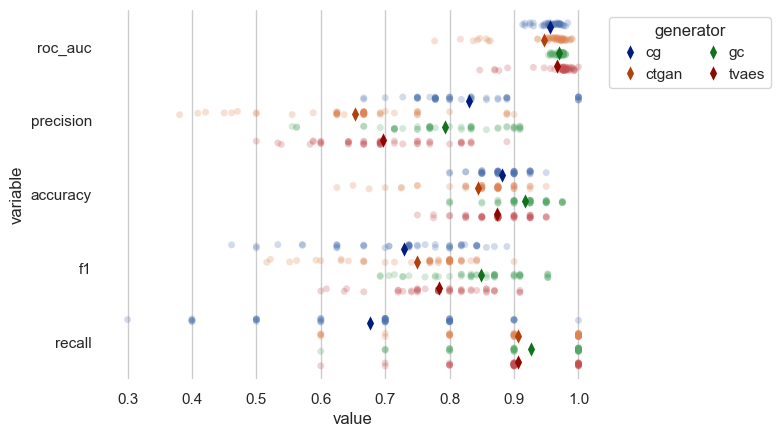

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = result_df.melt(id_vars="generator", value_vars=sort_metrics)

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d", markersize=4, linestyle="none",
)

# Improve the legend
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2, frameon=True, columnspacing=1, handletextpad=0)


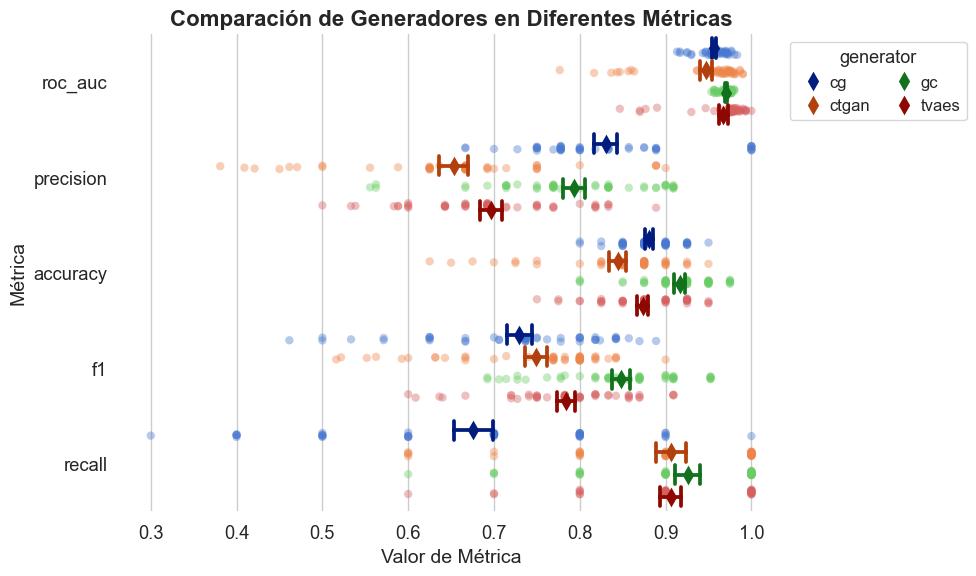

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo para una presentación clara y científica
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"figure.figsize": (10, 6)})

# "Melt" el dataset a formato largo
iris = result_df.melt(id_vars="generator", value_vars=sort_metrics)

# Inicializar la figura
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(bottom=True, left=True)

# Visualización con scatter plot para datos individuales
sns.stripplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=True, alpha=0.4, zorder=1, legend=False,
    size=6, palette="muted"
)

# Visualización con pointplot para mostrar promedios
sns.pointplot(
    data=iris, x="value", y="variable", hue="generator",
    dodge=0.7, palette="dark", errorbar="se",
    markers="d", markersize=7, linestyle="none", capsize=0.2
)

# Personalizar etiquetas de los ejes
ax.set_xlabel("Valor de Métrica", fontsize=14)
ax.set_ylabel("Métrica", fontsize=14)
ax.set_title("Comparación de Generadores en Diferentes Métricas", fontsize=16, fontweight="bold")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), 
                ncol=2, frameon=True, columnspacing=1, handletextpad=0,
                fontsize=12, title_fontsize=13
                )


# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()
